# Climate change indicators


In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
try:
    from prophet import Prophet
except ImportError:
    !pip install prophet
    from prophet import Prophet

In [255]:
import pandas as pd

# File paths
file_path1 = r"C:\Users\chris.mutuku\OneDrive - Skanem AS\Desktop\CAPSTONE PROJECT\Capstone-Project---Group-8\Data\Climate Change - datasets\all countries global temperature.csv"
file_path2 = r"C:\Users\chris.mutuku\OneDrive - Skanem AS\Desktop\CAPSTONE PROJECT\Capstone-Project---Group-8\Data\Climate Change - datasets\Average Surface Temperature.csv"

# Read the CSV files
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Display the first few rows of each dataframe
print("Data from all countries global temperature.csv:")
print(df1.head())

print("\nData from Average Surface Temperature.csv:")
print(df2.head())

Data from all countries global temperature.csv:
   ObjectId                  Country Name            Unit  \
0         1  Afghanistan, Islamic Rep. of  Degree Celsius   
1         2                       Albania  Degree Celsius   
2         3                       Algeria  Degree Celsius   
3         4                American Samoa  Degree Celsius   
4         5      Andorra, Principality of  Degree Celsius   

                      Change    1970   1971   1972   1973   1974   1975  ...  \
0  Surface Temperature Change  0.898  0.652 -1.089  0.262 -0.470 -0.468  ...   
1  Surface Temperature Change -0.119 -0.200 -0.077 -0.299 -0.134 -0.203  ...   
2  Surface Temperature Change  0.114 -0.380 -0.342 -0.028 -0.502 -0.554  ...   
3  Surface Temperature Change -0.036 -0.473 -0.070  0.322 -0.317 -0.128  ...   
4  Surface Temperature Change  0.081 -0.355 -0.526 -0.010 -0.412  0.207  ...   

    2012   2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  0.234  1.308  0.457  1.101 

## Loading the dataset

In [257]:
# Load the datasets
df1 = pd.read_csv(file_path1)  # All countries global temperature
df2 = pd.read_csv(file_path2)  # Average Surface Temperature

#### Basic EDA for df1 (All Countries Global Temperature)

In [258]:
print("Shape of df1:", df1.shape)  # Rows and columns
print("\nColumns in df1:", df1.columns.tolist())  # Column names
print("\nFirst 5 rows of df1:")
print(df1.head())
print("\nLast 5 rows of df1:")
print(df1.tail())

Shape of df1: (227, 56)

Columns in df1: ['ObjectId', 'Country Name', 'Unit', 'Change ', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

First 5 rows of df1:
   ObjectId                  Country Name            Unit  \
0         1  Afghanistan, Islamic Rep. of  Degree Celsius   
1         2                       Albania  Degree Celsius   
2         3                       Algeria  Degree Celsius   
3         4                American Samoa  Degree Celsius   
4         5      Andorra, Principality of  Degree Celsius   

                      Change    1970   1971   1972   1973   1974   1975  ...  \
0  Surface Temperature Cha

In [259]:
# Shape of the dataset
print("Shape of df1:", df1.shape)  # (227 rows, 56 columns)

# Column names
print("\nColumns in df1:", df1.columns.tolist())

# First 5 rows
print("\nFirst 5 rows of df1:")
print(df1.head())

# Last 5 rows
print("\nLast 5 rows of df1:")
print(df1.tail())

Shape of df1: (227, 56)

Columns in df1: ['ObjectId', 'Country Name', 'Unit', 'Change ', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

First 5 rows of df1:
   ObjectId                  Country Name            Unit  \
0         1  Afghanistan, Islamic Rep. of  Degree Celsius   
1         2                       Albania  Degree Celsius   
2         3                       Algeria  Degree Celsius   
3         4                American Samoa  Degree Celsius   
4         5      Andorra, Principality of  Degree Celsius   

                      Change    1970   1971   1972   1973   1974   1975  ...  \
0  Surface Temperature Cha

In [260]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns in df1:")
print(df1.describe())


Summary statistics for numerical columns in df1:
         ObjectId        1970        1971        1972        1973        1974  \
count  227.000000  190.000000  193.000000  195.000000  195.000000  193.000000   
mean   114.013216    0.097689   -0.190124   -0.075354    0.230226   -0.168347   
std     65.696573    0.354175    0.232647    0.385045    0.332191    0.291944   
min      1.000000   -1.284000   -0.879000   -1.796000   -0.992000   -0.953000   
25%     57.500000   -0.038750   -0.307000   -0.194500    0.047000   -0.335000   
50%    114.000000    0.133000   -0.206000   -0.026000    0.245000   -0.213000   
75%    170.500000    0.293750   -0.069000    0.113500    0.452500   -0.060000   
max    230.000000    0.978000    0.683000    0.942000    1.147000    1.125000   

             1975        1976        1977        1978  ...        2012  \
count  190.000000  192.000000  191.000000  192.000000  ...  214.000000   
mean    -0.024305   -0.243792    0.170592    0.079359  ...    0.887421  

In [261]:
# Missing values in df1
print("\nMissing values in df1:")
print(df1.isnull().sum())


Missing values in df1:
ObjectId         0
Country Name     0
Unit             0
Change           0
1970            37
1971            34
1972            32
1973            32
1974            34
1975            37
1976            35
1977            36
1978            35
1979            36
1980            34
1981            35
1982            35
1983            38
1984            37
1985            37
1986            36
1987            36
1988            36
1989            35
1990            36
1991            37
1992            16
1993            18
1994            18
1995            16
1996            16
1997            19
1998            15
1999            17
2000            16
2001            18
2002            15
2003            12
2004            13
2005            14
2006            11
2007            10
2008            14
2009            13
2010            12
2011            10
2012            13
2013            11
2014            11
2015            11
2016            12
2017   

In [262]:
# Unique values in 'Country Name'
print("\nNumber of unique countries:", df1['Country Name'].nunique())

# Unique values in 'Unit'
print("\nUnique values in 'Unit':", df1['Unit'].unique())

# Unique values in 'Change '
print("\nUnique values in 'Change ':", df1['Change '].unique())


Number of unique countries: 227

Unique values in 'Unit': ['Degree Celsius']

Unique values in 'Change ': ['Surface Temperature Change']


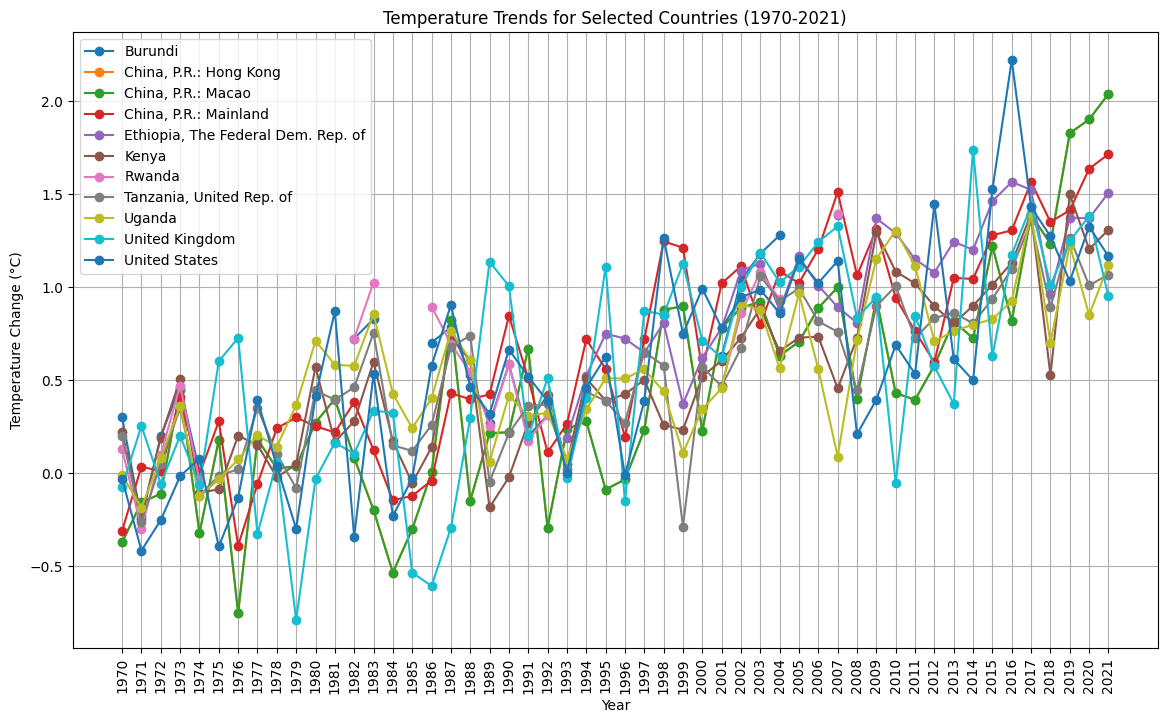

In [265]:
import matplotlib.pyplot as plt

# Select a few countries for visualization
countries = [
    "Burundi",
    "China, P.R.: Hong Kong",
    "China, P.R.: Macao",
    "China, P.R.: Mainland",
    "Ethiopia, The Federal Dem. Rep. of",
    "Kenya",
    "Rwanda",
    "Tanzania, United Rep. of",
    "Uganda",
    "United Kingdom",
    "United States"
]
# Plot temperature trends for selected countries
plt.figure(figsize=(14, 8))
for country in countries:
    country_data = df1[df1['Country Name'] == country]
    years = df1.columns[4:]  # Extract year columns (1970 to 2021)
    temperatures = country_data.iloc[:, 4:].values.flatten()
    plt.plot(years, temperatures, marker='o', label=country)

plt.title("Temperature Trends for Selected Countries (1970-2021)")
plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

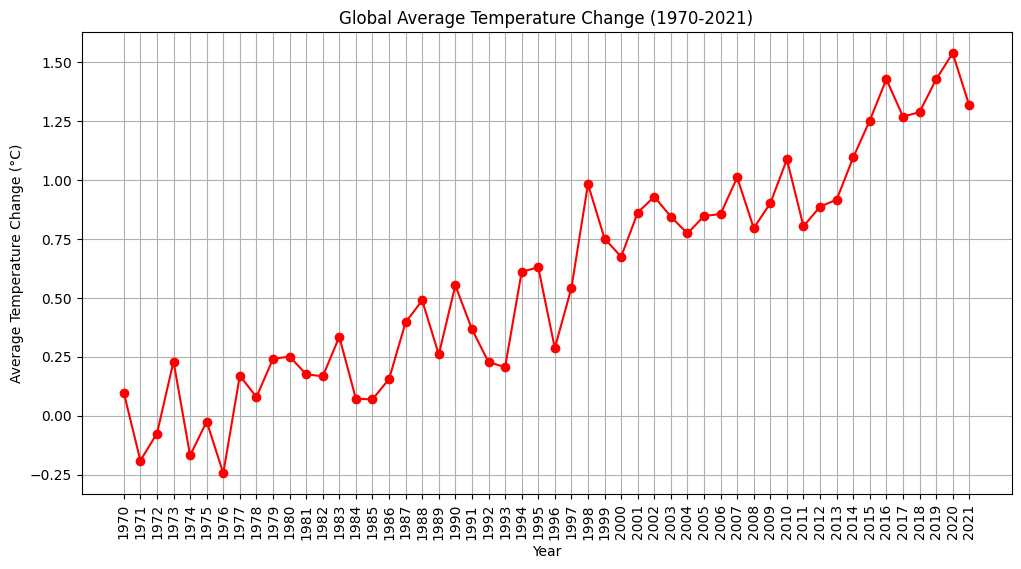

In [266]:
# Calculate global average temperature change for each year
global_avg_temps = df1.iloc[:, 4:].mean()

# Plot global average temperature trends
plt.figure(figsize=(12, 6))
plt.plot(global_avg_temps.index, global_avg_temps.values, marker='o', color='red')
plt.title("Global Average Temperature Change (1970-2021)")
plt.xlabel("Year")
plt.ylabel("Average Temperature Change (°C)")
plt.xticks(rotation=90)
plt.grid()
plt.show()

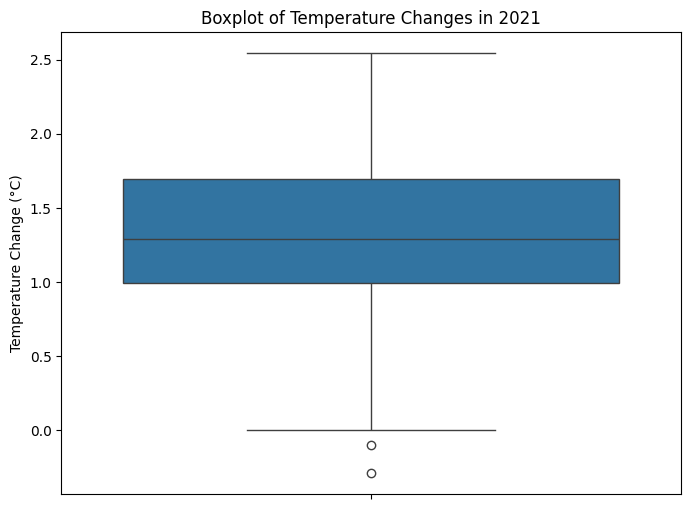

In [267]:
# Boxplot for temperature changes in 2021
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, y='2021')
plt.title("Boxplot of Temperature Changes in 2021")
plt.ylabel("Temperature Change (°C)")
plt.show()

In [269]:
print("Shape of df2:", df2.shape)  # Rows and columns
print("\nColumns in df2:", df2.columns.tolist())  # Column names
print("\nFirst 5 rows of df2:")
print(df2.head())
print("\nLast 5 rows of df2:")
print(df2.tail())

Shape of df2: (199290, 6)

Columns in df2: ['Country Name', 'Code', 'year', 'Day', 'Average surface temperature', 'Average surface temperature.1']

First 5 rows of df2:
  Country Name Code  year        Day  Average surface temperature  \
0  Afghanistan  AFG  1940  1/15/1940                    -2.032494   
1  Afghanistan  AFG  1940  2/15/1940                    -0.733503   
2  Afghanistan  AFG  1940  3/15/1940                     1.999134   
3  Afghanistan  AFG  1940  4/15/1940                    10.199754   
4  Afghanistan  AFG  1940  5/15/1940                    17.942135   

   Average surface temperature.1  
0                      11.327695  
1                      11.327695  
2                      11.327695  
3                      11.327695  
4                      11.327695  

Last 5 rows of df2:
       Country Name Code  year         Day  Average surface temperature  \
199285     Zimbabwe  ZWE  2024  10/15/2024                    24.407030   
199286     Zimbabwe  ZWE  2024  11/

In [270]:
# Shape of the dataset
print("Shape of df2:", df2.shape)  # (199290 rows, 6 columns)

# Column names
print("\nColumns in df2:", df2.columns.tolist())

# First 5 rows
print("\nFirst 5 rows of df2:")
print(df2.head())

# Last 5 rows
print("\nLast 5 rows of df2:")
print(df2.tail())

Shape of df2: (199290, 6)

Columns in df2: ['Country Name', 'Code', 'year', 'Day', 'Average surface temperature', 'Average surface temperature.1']

First 5 rows of df2:
  Country Name Code  year        Day  Average surface temperature  \
0  Afghanistan  AFG  1940  1/15/1940                    -2.032494   
1  Afghanistan  AFG  1940  2/15/1940                    -0.733503   
2  Afghanistan  AFG  1940  3/15/1940                     1.999134   
3  Afghanistan  AFG  1940  4/15/1940                    10.199754   
4  Afghanistan  AFG  1940  5/15/1940                    17.942135   

   Average surface temperature.1  
0                      11.327695  
1                      11.327695  
2                      11.327695  
3                      11.327695  
4                      11.327695  

Last 5 rows of df2:
       Country Name Code  year         Day  Average surface temperature  \
199285     Zimbabwe  ZWE  2024  10/15/2024                    24.407030   
199286     Zimbabwe  ZWE  2024  11/

In [271]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns in df2:")
print(df2.describe())


Summary statistics for numerical columns in df2:
                year  Average surface temperature  \
count  199290.000000                199290.000000   
mean     1982.084149                    18.066105   
std        24.585286                    10.251394   
min      1940.000000                   -36.240032   
25%      1961.000000                    12.287746   
50%      1982.000000                    22.053738   
75%      2003.000000                    25.317117   
max      2025.000000                    39.889374   

       Average surface temperature.1  
count                  199290.000000  
mean                       18.075053  
std                         8.710005  
min                       -21.529121  
25%                        10.572247  
50%                        21.858255  
75%                        25.143888  
max                        29.794220  


In [272]:
# Missing values in df2
print("\nMissing values in df2:")
print(df2.isnull().sum())


Missing values in df2:
Country Name                     0
Code                             0
year                             0
Day                              0
Average surface temperature      0
Average surface temperature.1    0
dtype: int64


In [273]:
# Unique values in 'Country Name'
print("\nNumber of unique countries:", df2['Country Name'].nunique())

# Unique values in 'Code'
print("\nUnique values in 'Code':", df2['Code'].nunique())

# Unique values in 'year'
print("\nUnique values in 'year':", df2['year'].unique())

# Unique values in 'Day'
print("\nNumber of unique days:", df2['Day'].nunique())


Number of unique countries: 195

Unique values in 'Code': 195

Unique values in 'year': [1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023
 2024 2025]

Number of unique days: 1022
